In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns

In [9]:
# ## Sample Dataset: Titanic Dataset
from sklearn.datasets import fetch_openml
data = fetch_openml("titanic", version=1, as_frame=True)
df = data.frame

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

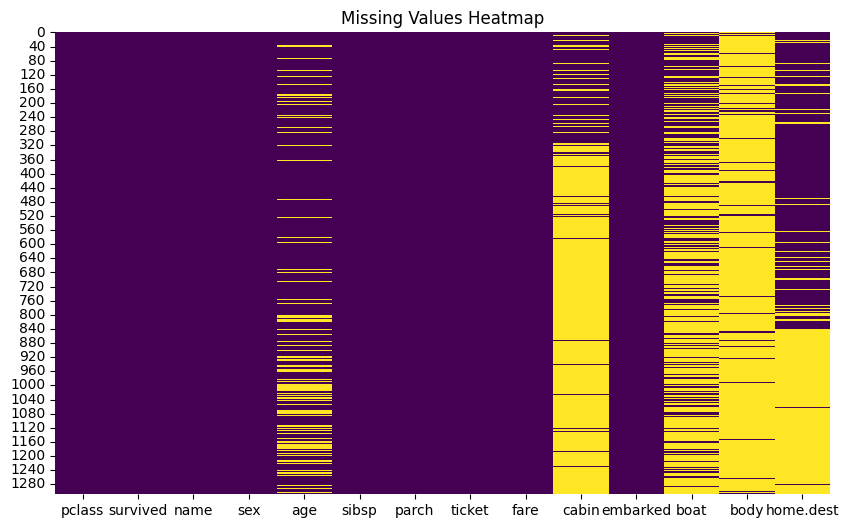

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
# Remove rows with missing values
removed_rows = df.dropna()
print("Dataset shape after removing rows with missing values:", removed_rows.shape)

Dataset shape after removing rows with missing values: (0, 14)


In [10]:
# Remove columns with more than 30% missing values
threshold = 0.3
removed_columns = df.dropna(axis=1, thresh=int((1-threshold) * len(df)))
print("Dataset shape after removing columns with excessive missing values:", removed_columns.shape)

Dataset shape after removing columns with excessive missing values: (1309, 10)


In [12]:
mean_imputed = df.copy()
mean_imputed['age'] = mean_imputed['age'].fillna(mean_imputed['age'].mean())

In [14]:
mean_imputed.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [13]:
mode_imputed = df.copy()
mode_imputed['embarked'] = mode_imputed['embarked'].fillna(mode_imputed['embarked'].mode()[0])

In [15]:
mode_imputed.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [16]:
forward_filled = df.copy()
forward_filled = forward_filled.fillna(method='ffill')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12932\2846849285.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_filled = forward_filled.fillna(method='ffill')


In [19]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed = knn_imputer.fit_transform(df.select_dtypes(include=[np.number]))
knn_imputed = pd.DataFrame(knn_imputed, columns=df.select_dtypes(include=[np.number]).columns)